___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [212]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,age,annual_income,spending_score,cluster_Annual_Income_Spending_Score
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2


#### Explore Data

You can rename columns to more usable, if you need.

In [5]:
df.rename(columns={"Annual Income (k$)": "annual_income","Spending Score (1-100)": "spending_score", "Age":"age", "Gender":"gender"}, inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [6]:
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.shape

(200, 5)

In [9]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [10]:
df['gender']=df['gender'].replace({'Female':0,'Male':1})

In [11]:
# df.Gender=df.Gender.map({"Male":1,"Gender":0})

In [12]:
df.gender.value_counts()

0    112
1     88
Name: gender, dtype: int64

In [13]:
df.describe()

,CustomerID,gender,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [14]:
df2=df.copy()

In [164]:
df.drop("CustomerID", axis=1, inplace=True)

In [16]:
df.nunique()

CustomerID        200
gender              2
age                51
annual_income      64
spending_score     84
dtype: int64

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

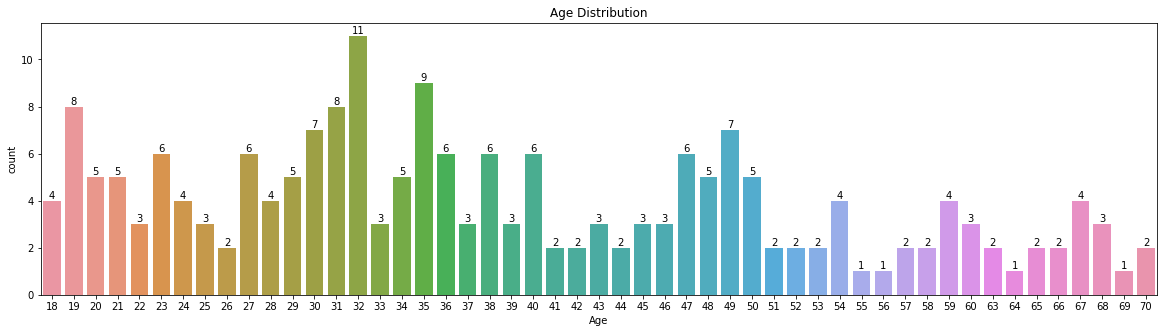

In [17]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x ='age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

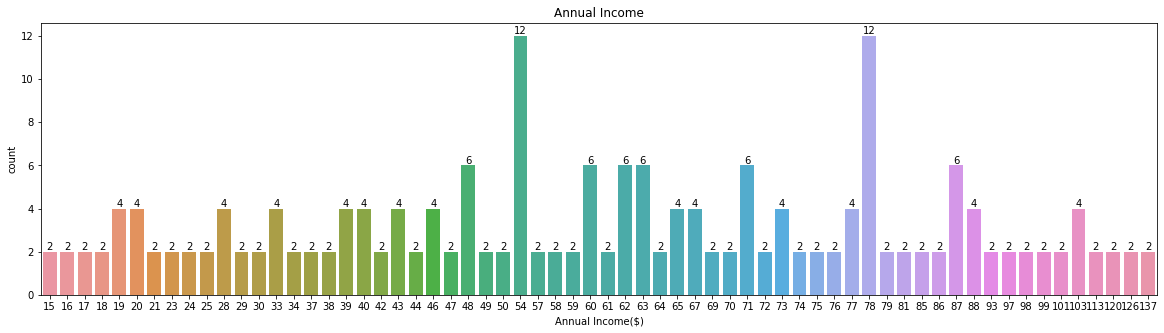

In [18]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='annual_income', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
ax.bar_label(ax.containers[0]);

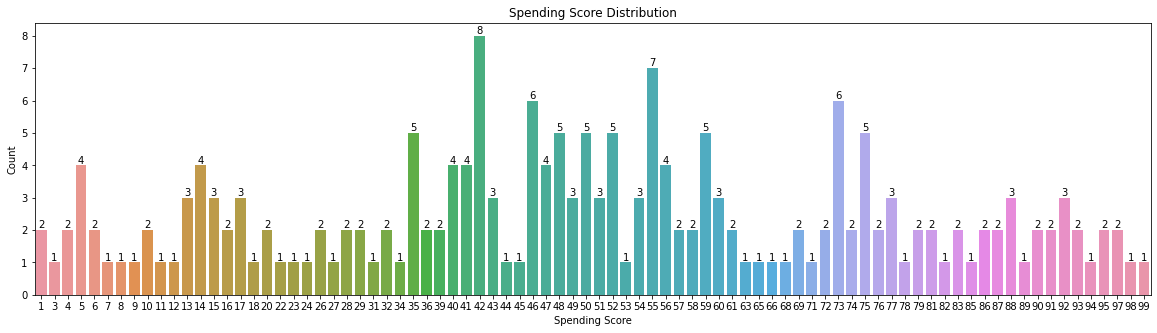

In [19]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='spending_score', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

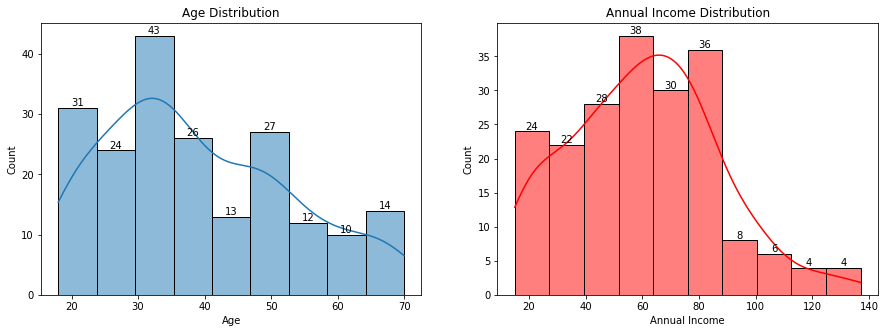

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.histplot(x='age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = sns.histplot(x ='annual_income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

(-1.25, 1.25, -1.25, 1.25)

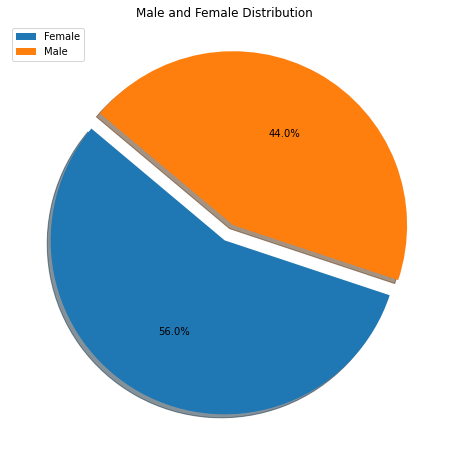

In [21]:
plt.figure(figsize=(8,8))

explode = [0, 0.1]
plt.pie(df['gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

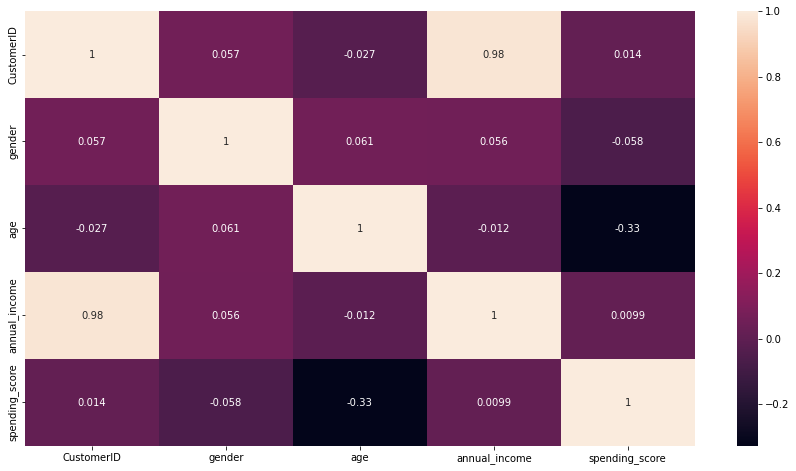

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

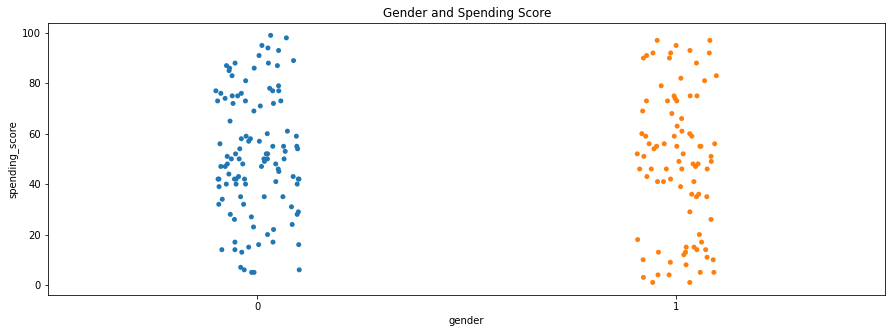

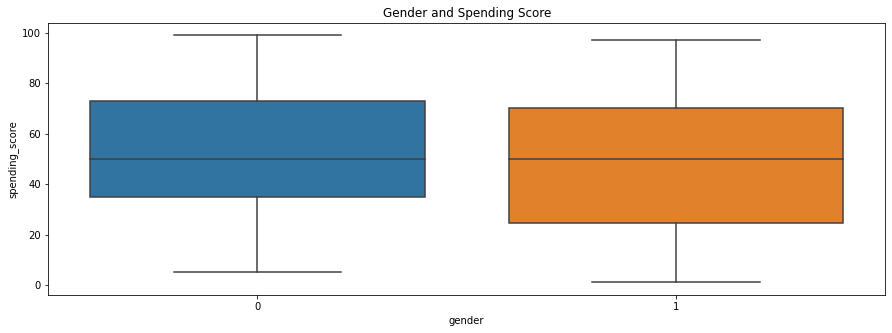

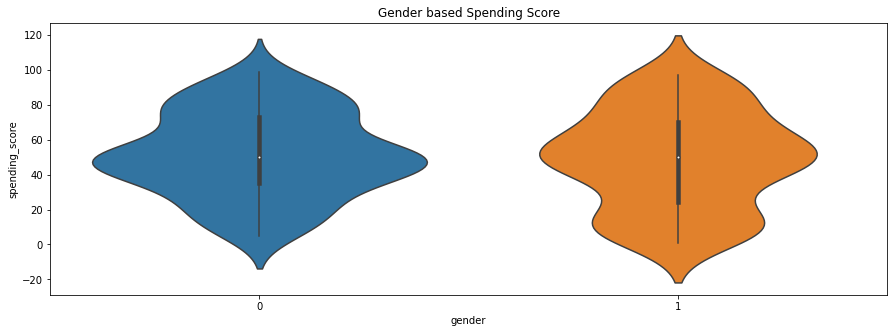

In [23]:
plt.figure(figsize=(15,5))
sns.stripplot(x='gender', y='spending_score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='gender', y='spending_score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='gender', y='spending_score', data=df)
plt.title('Gender based Spending Score')
plt.show()

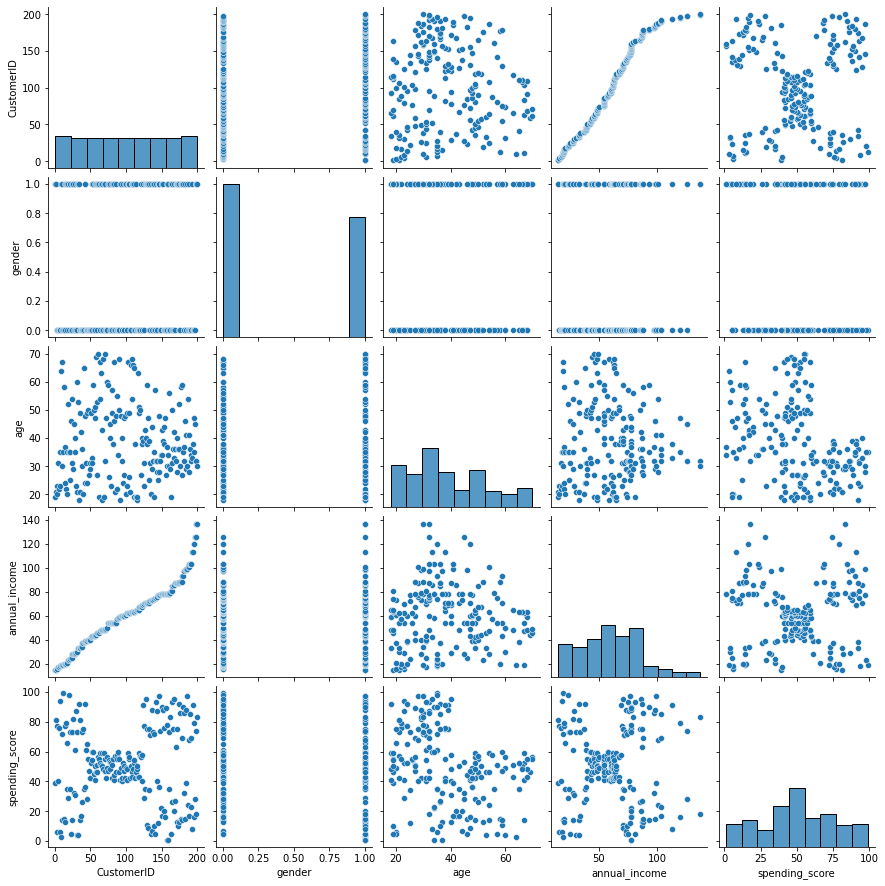

In [24]:
sns.pairplot(df)

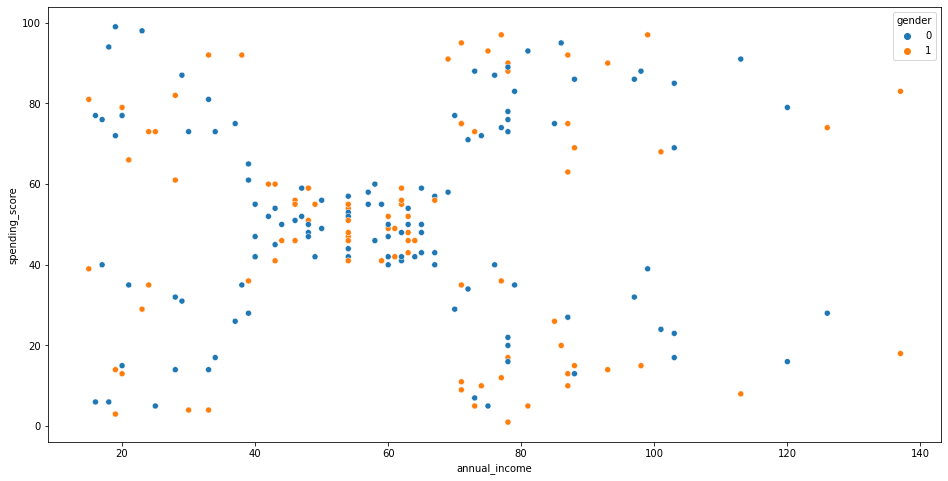

In [25]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='annual_income', y='spending_score', data=df, hue = "gender")
plt.show()

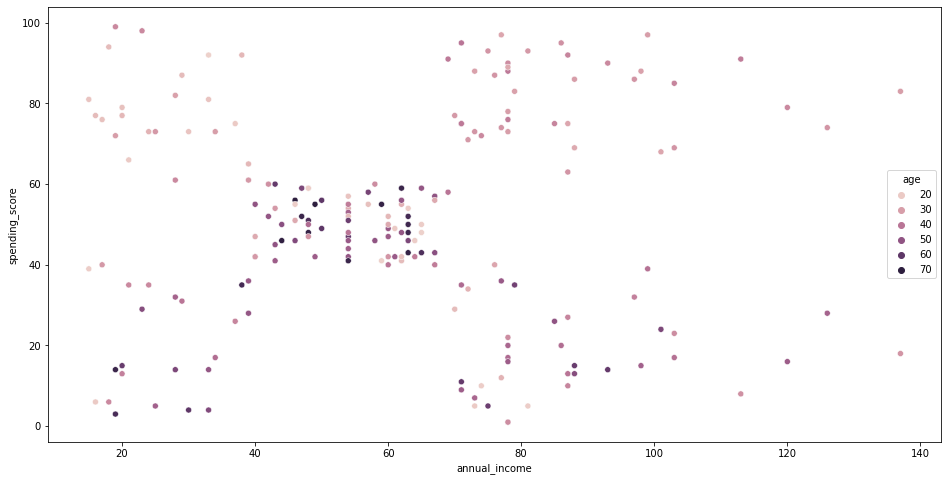

In [26]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='annual_income', y='spending_score', data=df, hue = "age")
plt.show()

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [35]:
df2 = df.drop(columns="gender") # cluster modellerde dummy features düşürülmeli. 

In [36]:
from pyclustertend import hopkins

In [45]:
from sklearn.preprocessing import StandardScaler

In [41]:
hopkins(StandardScaler().fit_transform(df2), df2.shape[0])

0.18952922756182283

In [69]:
X1= df2[{"age", "spending_score"}]
X1

,spending_score,age
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31
...,...,...
195,79,35
196,28,45
197,74,32
198,18,32


In [43]:
hopkins(StandardScaler().fit_transform(X1), X1.shape[0])

0.3159137275866822

#### *ii. Determine optimal number of clusters*

In [50]:
X1_scaled= scaler.fit_transform(X1)

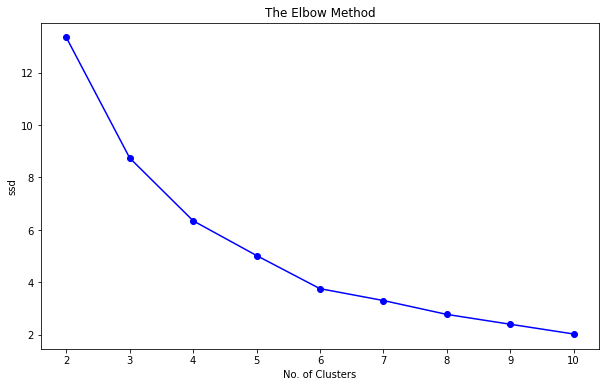

In [51]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X1_scaled)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [52]:
ssd

[13.33769058080424,
 8.742042168276537,
 6.350246319122476,
 5.026143351352526,
 3.7627968093270687,
 3.310446181738139,
 2.781552120356595,
 2.4066362812228754,
 2.0355121456182492]

In [53]:
pd.Series(ssd).diff()

0         NaN
1   -4.595648
2   -2.391796
3   -1.324103
4   -1.263347
5   -0.452351
6   -0.528894
7   -0.374916
8   -0.371124
dtype: float64

In [54]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,4.595648
3,2.391796
4,1.324103
5,1.263347
6,0.452351
7,0.528894
8,0.374916
9,0.371124


<AxesSubplot:>

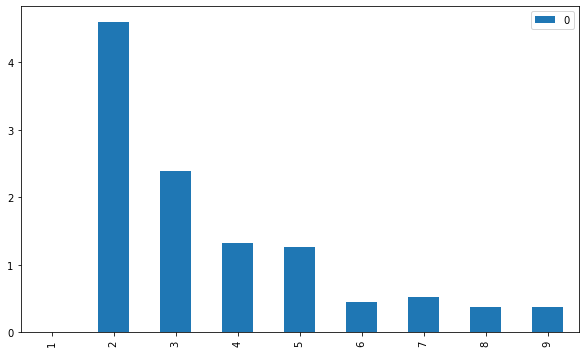

In [55]:
df_diff.plot(kind='bar')

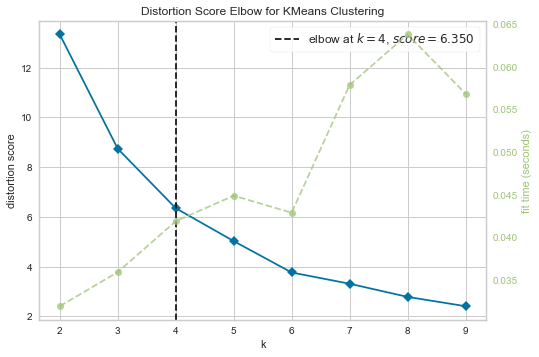

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X1_scaled)
visu.poof()

In [57]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47252865228696783
For n_clusters=3, the silhouette score is 0.44058221683010546
For n_clusters=4, the silhouette score is 0.4288271307195919
For n_clusters=5, the silhouette score is 0.4462533058710072
For n_clusters=6, the silhouette score is 0.4561522538626525
For n_clusters=7, the silhouette score is 0.40578335793980247
For n_clusters=8, the silhouette score is 0.41699081110297276
For n_clusters=9, the silhouette score is 0.4343827451704746
For n_clusters=10, the silhouette score is 0.4374443365138722


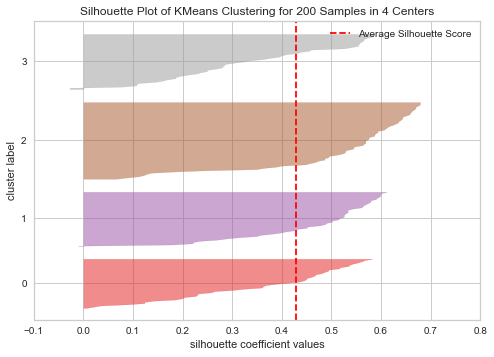

In [58]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X1_scaled)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [59]:
kmeans = KMeans(n_clusters = 4, random_state=42)

In [60]:
kmeans.fit_predict(X1_scaled)

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [75]:
centers =kmeans.cluster_centers_
centers

array([[0.42103984, 0.14423077],
       [0.48269743, 0.7416388 ],
       [0.80423862, 0.23639053],
       [0.17542336, 0.52454992]])

In [76]:
centers[:,0]

array([0.42103984, 0.48269743, 0.80423862, 0.17542336])

In [77]:
centers[:,1]

array([0.14423077, 0.7416388 , 0.23639053, 0.52454992])

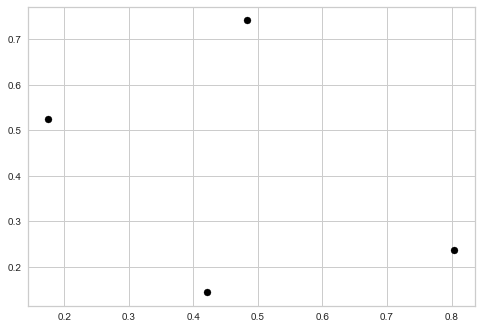

In [78]:
plt.scatter(centers[:,0], centers[:,1], c = "black")

In [79]:
X1["cluster_Kmeans"] = kmeans.fit_predict(X1_scaled)

In [85]:
X1.head()

,spending_score,age,cluster_Kmeans
0,39,19,0
1,81,21,2
2,6,20,0
3,77,23,2
4,40,31,0


In [89]:
# plt.scatter(X1["age"], X1["spending_score"], c = X1.cluster_Kmeans, cmap = "viridis", alpha=0.7) # tahmin edilen kümelemeye göre
# plt.scatter(centers[:,0], centers[:, 1], c='black', s=200, alpha=0.5)

<AxesSubplot:xlabel='age', ylabel='spending_score'>

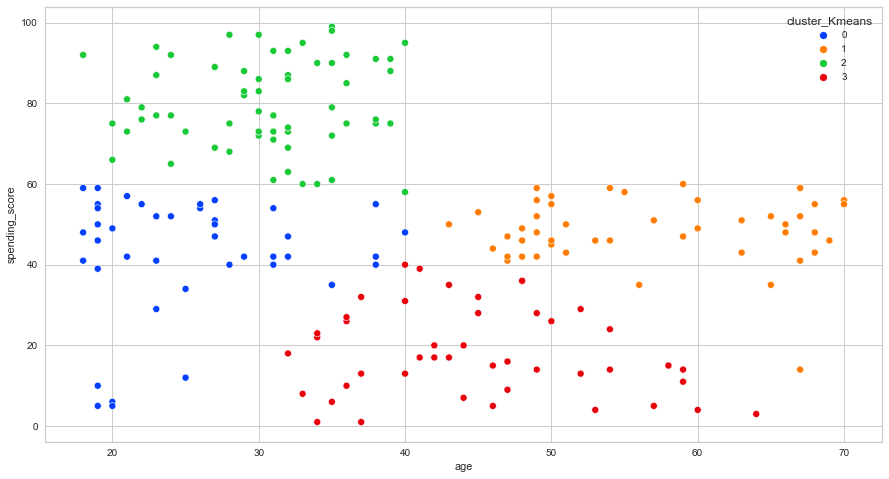

In [88]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age', y='spending_score', hue='cluster_Kmeans', data=X1, palette="bright")

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [91]:
X2 = df.loc[:,['annual_income','spending_score']]
X2.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [93]:
X2.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


#### *ii. Determine optimal number of clusters*

In [94]:
hopkins(X2, X2.shape[0])

0.3228864365357172

In [95]:
hopkins(StandardScaler().fit_transform(X2), X2.shape[0])

0.32985545603712774

In [96]:
X2_scaled= scaler.fit_transform(X2)

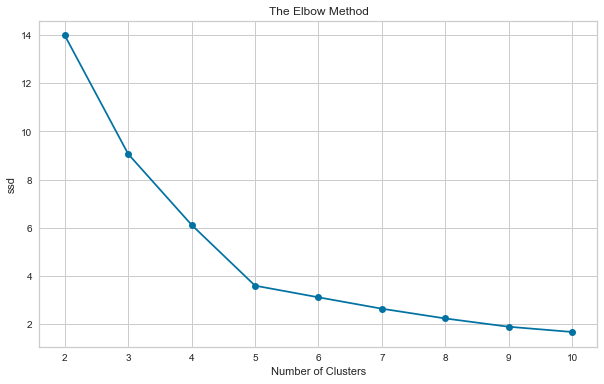

In [97]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X2_scaled)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

In [98]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,4.934520
3,2.948673
4,2.527194
5,0.484733
6,0.474281
7,0.406047
8,0.344623
9,0.217640


<AxesSubplot:>

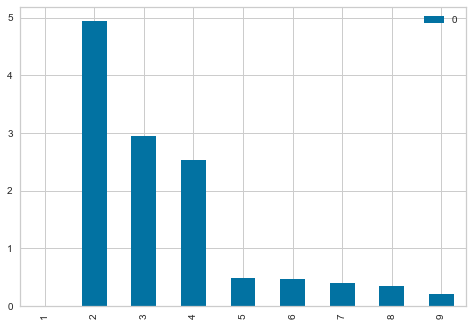

In [99]:
df_diff.plot(kind='bar')

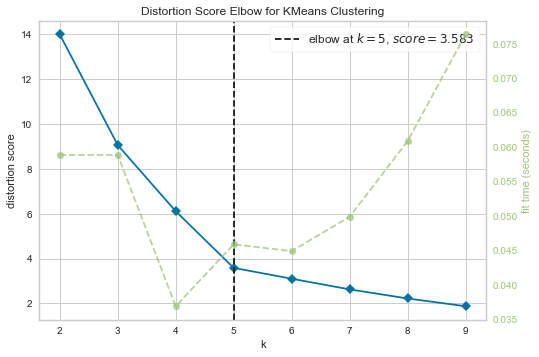

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X2_scaled)
visu.poof()

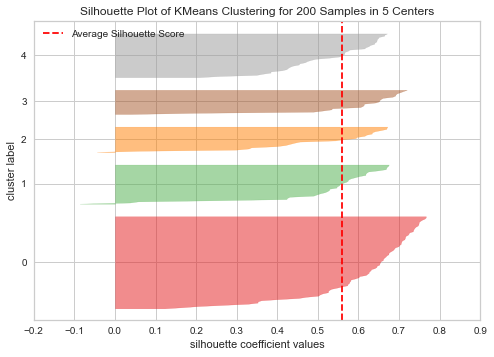

In [101]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X2_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [104]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.33340205479521
For n_clusters=3, the silhouette score is 0.4514909309424474
For n_clusters=4, the silhouette score is 0.49620078745146784
For n_clusters=5, the silhouette score is 0.5594854531227246
For n_clusters=6, the silhouette score is 0.5377658512956012
For n_clusters=7, the silhouette score is 0.5187916611768829
For n_clusters=8, the silhouette score is 0.43038461857643606
For n_clusters=9, the silhouette score is 0.4435209006412269
For n_clusters=10, the silhouette score is 0.44658569342940413


#### *iii. Apply K Means*

In [106]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X2_scaled)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [107]:
X2['cluster_Kmeans'] = kmeans2.fit_predict(X2_scaled) #kmeans2.labels_
X2

,annual_income,spending_score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

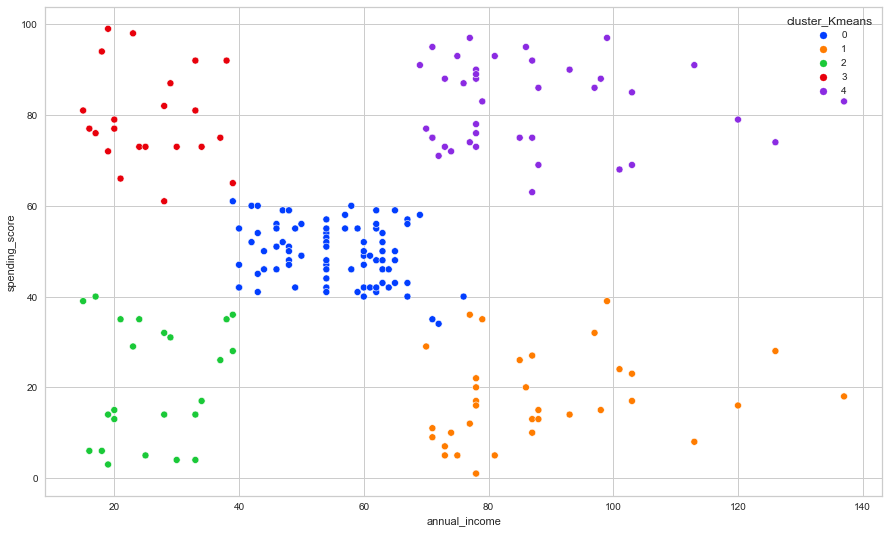

In [111]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster_Kmeans', data=X2, palette="bright")

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [112]:
from scipy.cluster.hierarchy import linkage

In [113]:
hc_ward = linkage(y = X1_scaled, method = "ward")
hc_complete = linkage(X1_scaled, "complete")
hc_average = linkage(X1_scaled, "average")
hc_single = linkage(X1_scaled, "single")

In [114]:
from scipy.cluster.hierarchy import dendrogram

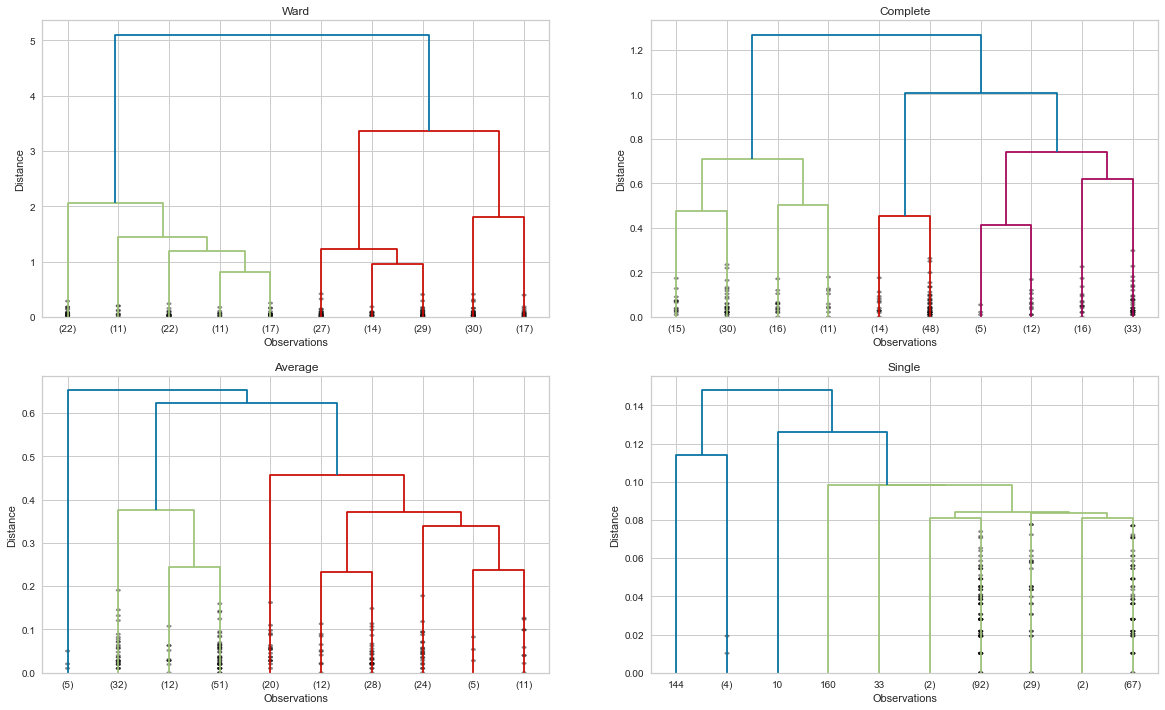

In [115]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

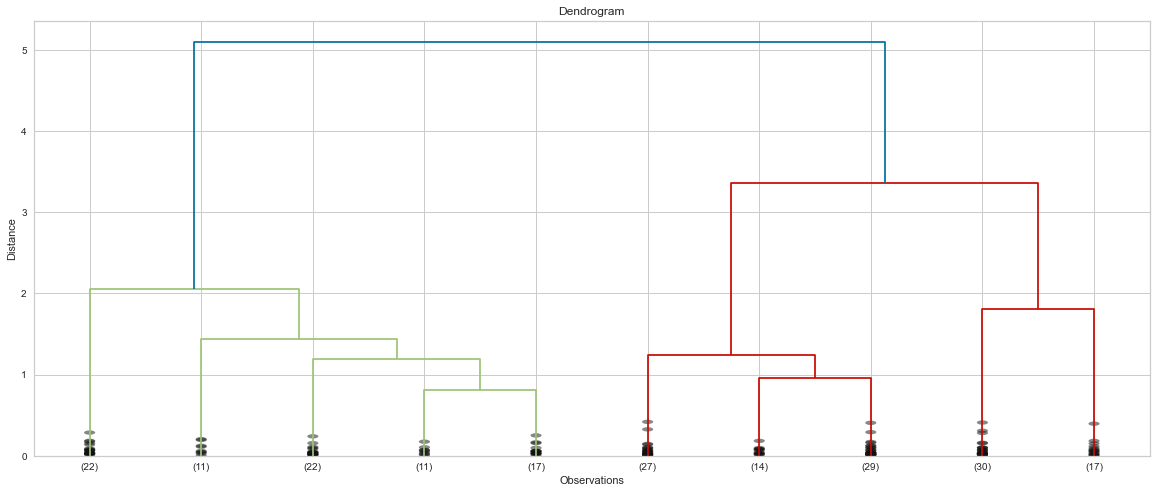

In [119]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

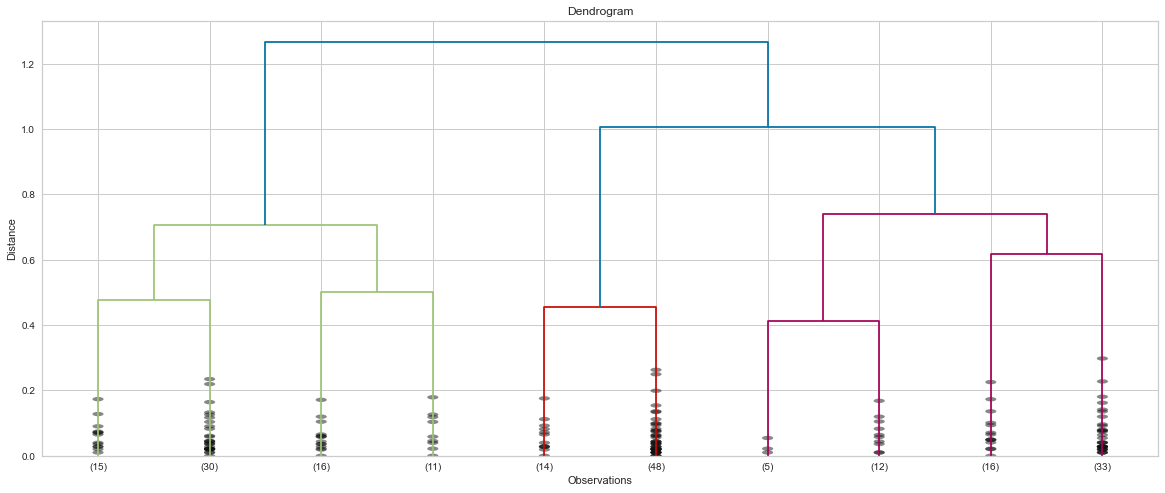

In [118]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [120]:
from sklearn.cluster import AgglomerativeClustering

In [128]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1_scaled)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.41699937625242867
For n_clusters=3, the silhouette score is 0.417124576652748
For n_clusters=4, the silhouette score is 0.3898644314748176
For n_clusters=5, the silhouette score is 0.3766824104633081
For n_clusters=6, the silhouette score is 0.3992093201029108
For n_clusters=7, the silhouette score is 0.35892982172762056
For n_clusters=8, the silhouette score is 0.3611306861915169
For n_clusters=9, the silhouette score is 0.3657953810746084
For n_clusters=10, the silhouette score is 0.36870509584171


In [129]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4545366687343291
For n_clusters=3, the silhouette score is 0.42904092711225034
For n_clusters=4, the silhouette score is 0.4529289087492836
For n_clusters=5, the silhouette score is 0.4182601312731258
For n_clusters=6, the silhouette score is 0.4183874033188332
For n_clusters=7, the silhouette score is 0.39053502406525836
For n_clusters=8, the silhouette score is 0.3897722753173538
For n_clusters=9, the silhouette score is 0.3994946048075374
For n_clusters=10, the silhouette score is 0.3890993360389514


## Clustering based on Annual Income and Spending Score- x2

In [130]:
hc_ward = linkage(y = X2_scaled, method = "ward")
hc_complete = linkage(X2_scaled, "complete")
hc_average = linkage(X2_scaled, "average")
hc_single = linkage(X2_scaled, "single")

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

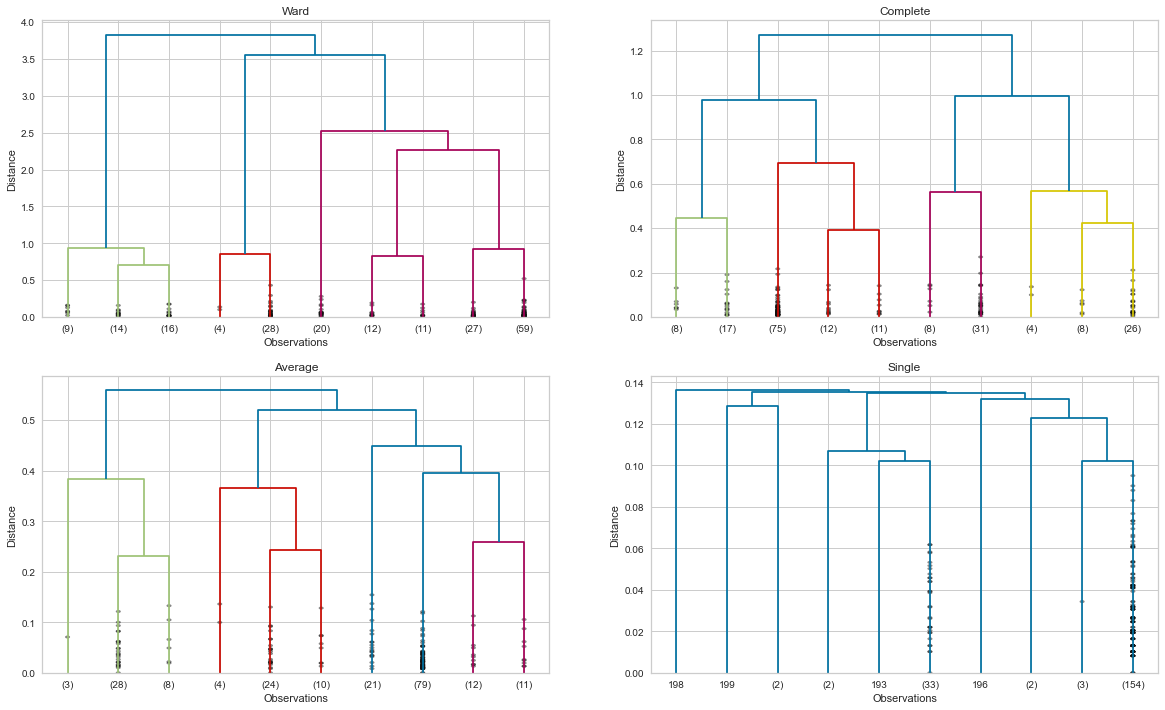

In [131]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

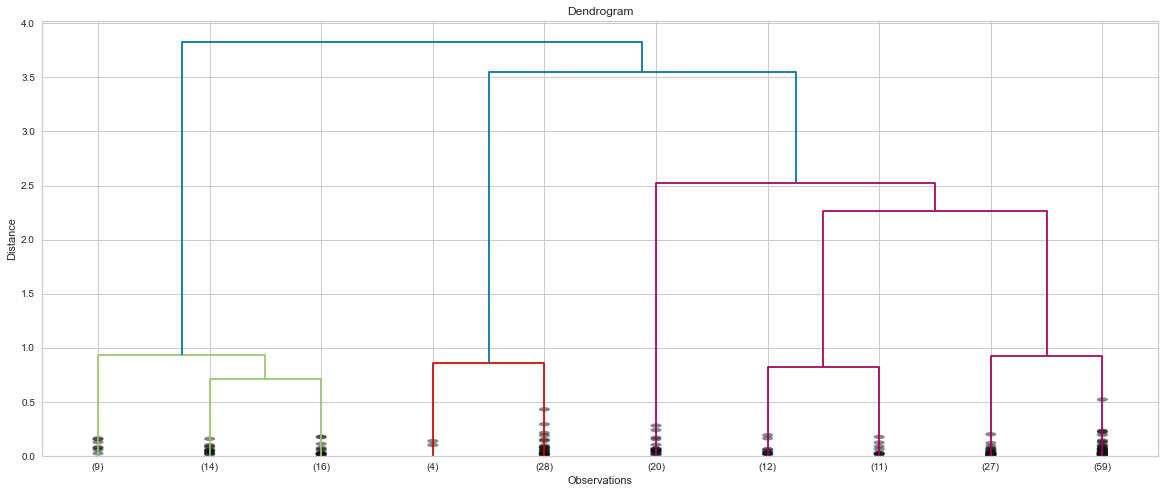

In [132]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

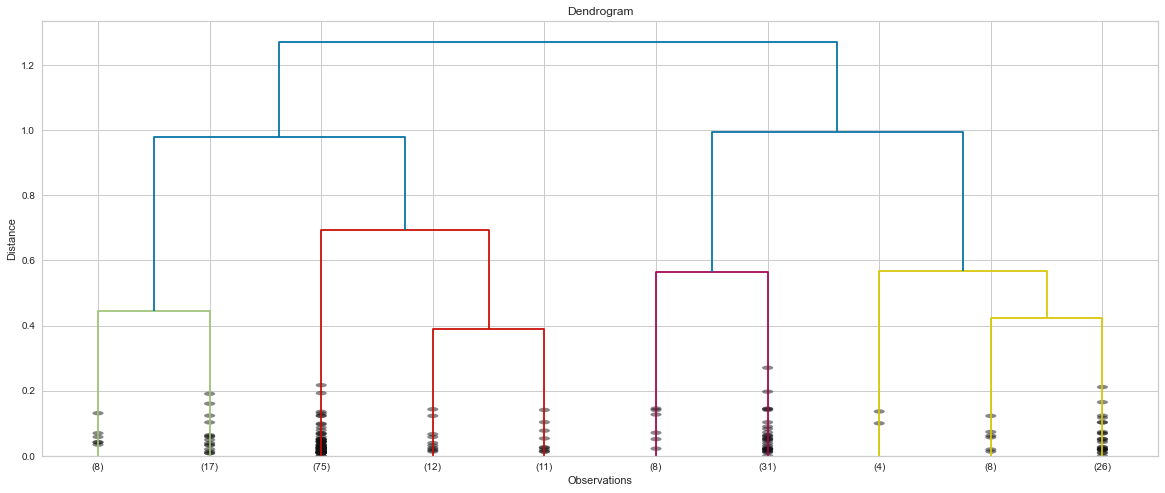

In [133]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [134]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2_scaled)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.39090074716611595
For n_clusters=3, the silhouette score is 0.44796167261691394
For n_clusters=4, the silhouette score is 0.4976418539903167
For n_clusters=5, the silhouette score is 0.5582698727196419
For n_clusters=6, the silhouette score is 0.5296670434232814
For n_clusters=7, the silhouette score is 0.409308025869031
For n_clusters=8, the silhouette score is 0.41055127971395405
For n_clusters=9, the silhouette score is 0.4177210331066167
For n_clusters=10, the silhouette score is 0.42320643020741444


In [135]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713
For n_clusters=9, the silhouette score is 0.43944465774630276
For n_clusters=10, the silhouette score is 0.4345958236001419


### ii. *Apply Agglomerative Clustering*

In [141]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X1_scaled)

In [151]:
X1['cluster_Agg'] = y_agg
X1.head()

,spending_score,age,cluster_Kmeans,cluster_Agg
0,39,19,0,0
1,81,21,2,2
2,6,20,0,0
3,77,23,2,2
4,40,31,0,0


#### Annual Income and Spending Score- x2

In [152]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X2_scaled)

In [153]:
X2['cluster_Agg'] = y_agg2
X2.head()

,annual_income,spending_score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

<AxesSubplot:xlabel='age', ylabel='spending_score'>

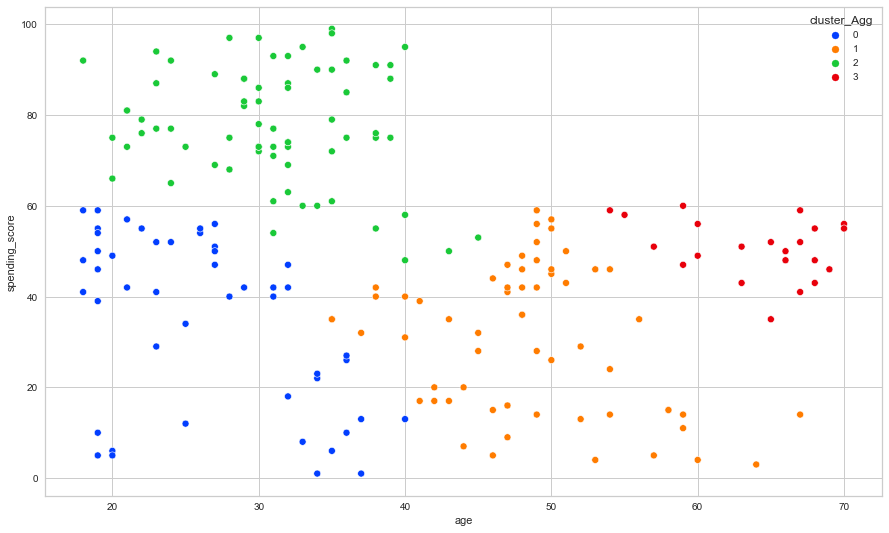

In [154]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='age', y='spending_score', hue='cluster_Agg', data=X1, palette="bright")

Text(0.5, 1.0, 'Agg')

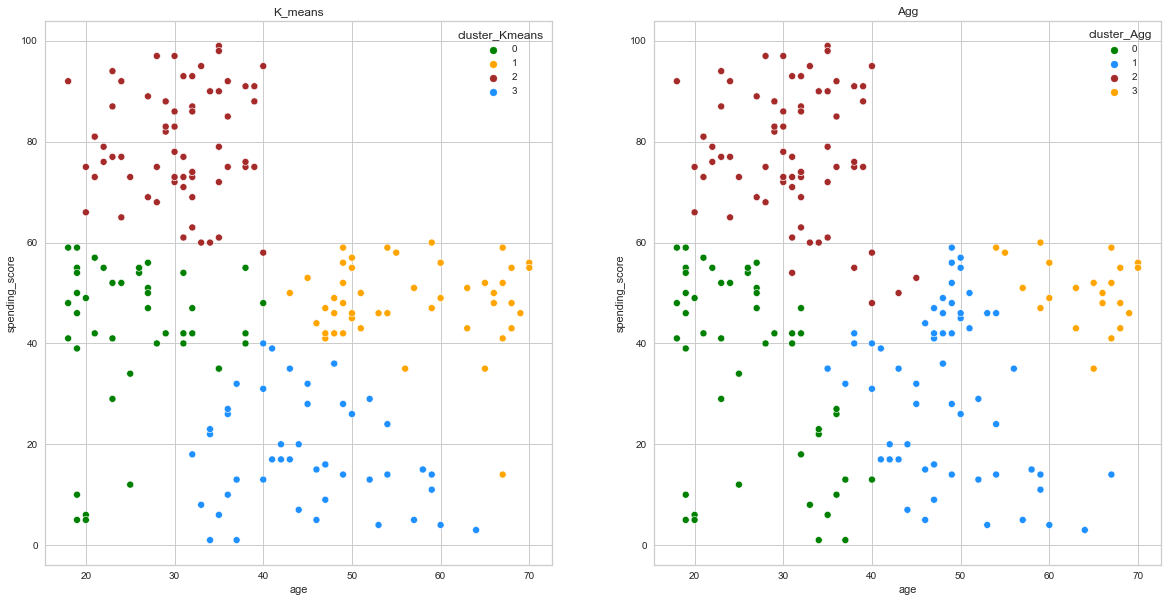

In [191]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='age', y='spending_score', hue='cluster_Kmeans', data=X1, palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='age', y='spending_score', hue='cluster_Agg', data=X1, palette=['green','dodgerblue', 'brown','orange',
                                                                             ])
plt.title("Agg")

#### Annual Income and Spending Score- x2

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

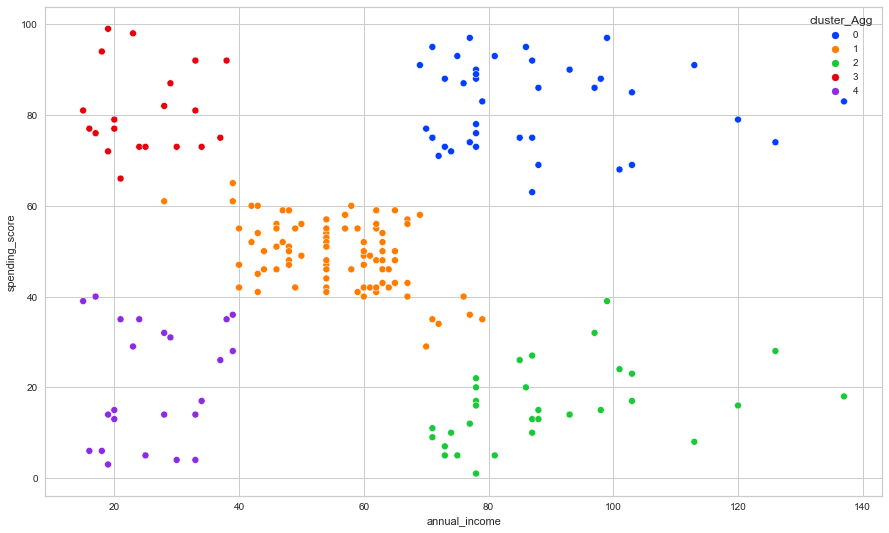

In [157]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster_Agg', data=X2 ,palette="bright")

Text(0.5, 1.0, 'Agg')

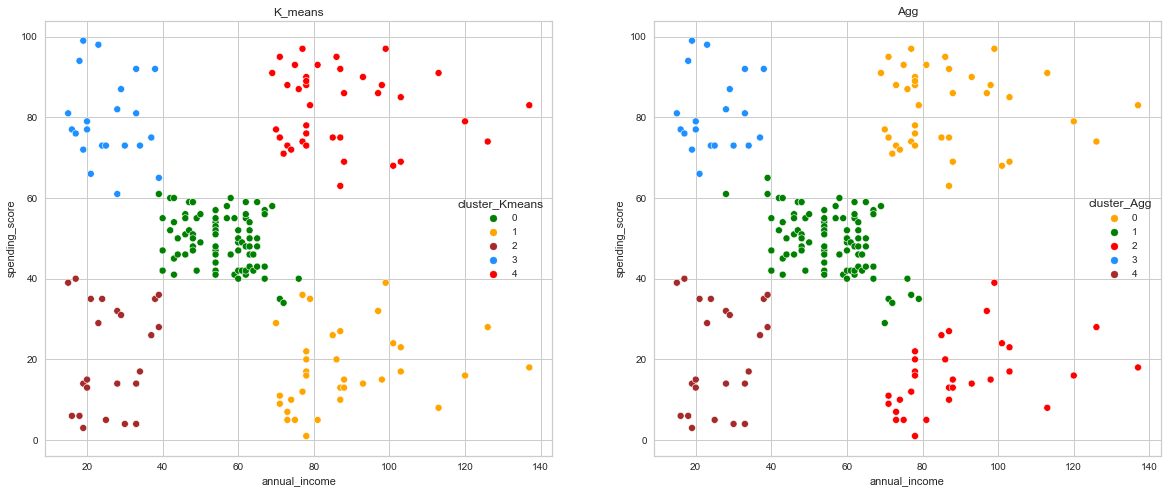

In [159]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster_Kmeans', data=X2, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster_Agg', data=X2, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- x1

In [160]:
X1.head()

,spending_score,age,cluster_Kmeans,cluster_Agg
0,39,19,0,0
1,81,21,2,2
2,6,20,0,0
3,77,23,2,2
4,40,31,0,0


In [161]:
X1.cluster_Kmeans.value_counts()

2    65
3    47
1    46
0    42
Name: cluster_Kmeans, dtype: int64

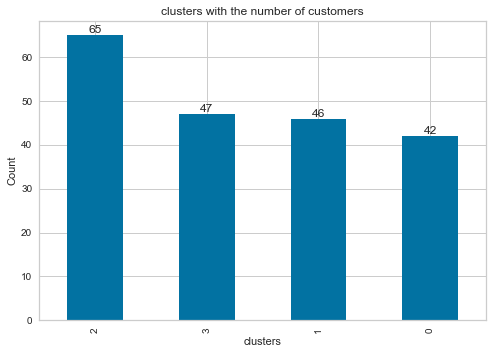

In [162]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X1.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [165]:
df.head()

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [167]:
df["cluster_Age_Spending_Score"] = X1.cluster_Kmeans
df.head()

,gender,age,annual_income,spending_score,cluster_Age_Spending_Score
0,1,19,15,39,0
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0


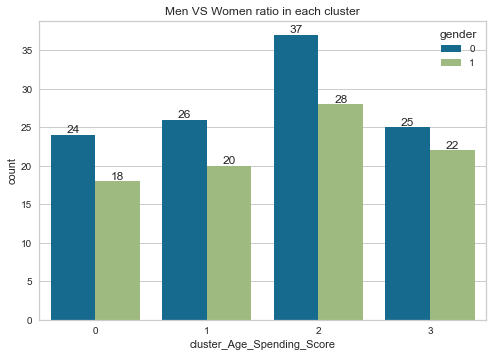

In [169]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.gender) #  1 : Male
for p in ax.containers:
    ax.bar_label(p)

In [194]:
df.groupby("cluster_Age_Spending_Score").mean()

,age,annual_income,spending_score
cluster_Age_Spending_Score,,,
0,25.500000,54.357143,42.261905
1,56.565217,53.500000,48.304348
2,30.292308,63.830769,79.815385
3,45.276596,68.489362,18.191489


<AxesSubplot:xlabel='cluster_Age_Spending_Score', ylabel='spending_score'>

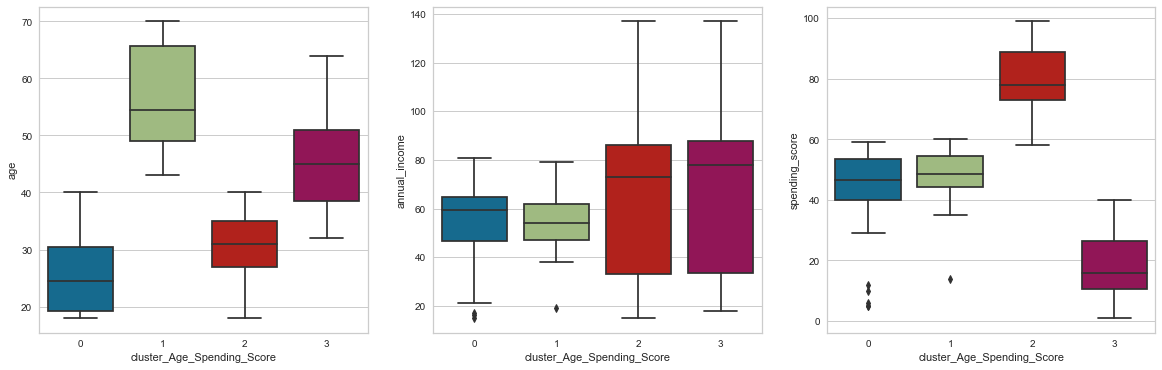

In [195]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.boxplot(y = "annual_income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.boxplot(y = "spending_score", x = "cluster_Age_Spending_Score", data = df)


<AxesSubplot:xlabel='cluster_Age_Spending_Score', ylabel='spending_score'>

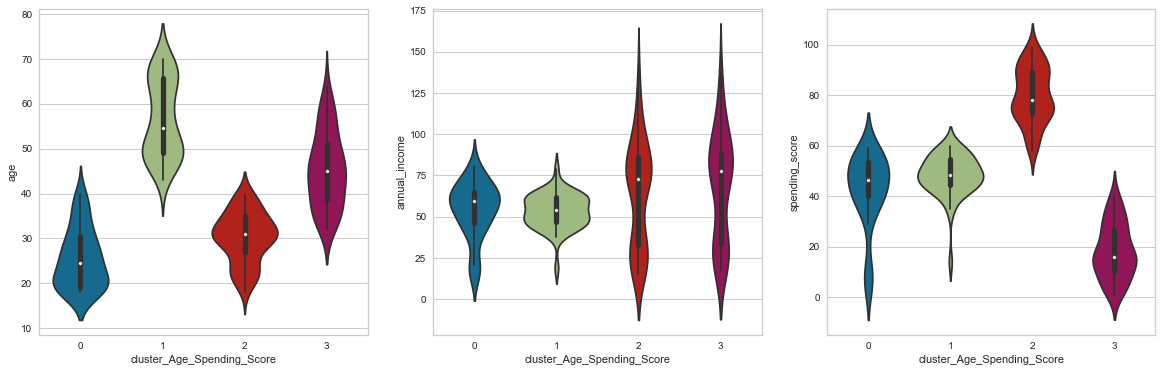

In [174]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.violinplot(y = "annual_income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.violinplot(y = "spending_score", x = "cluster_Age_Spending_Score", data = df)

In [178]:
#df.drop("gender", axis=1, inplace=True)

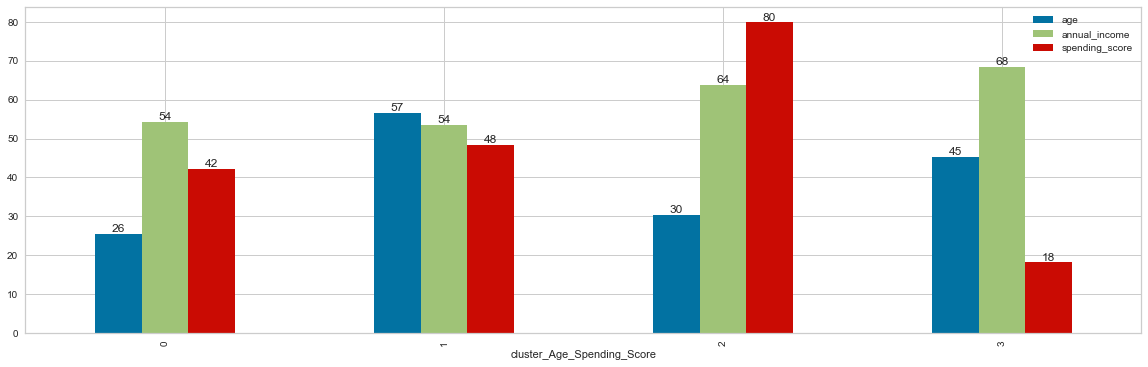

In [179]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

In [ ]:
### Female

**cluster 0** : The average age is around 41, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

In [ ]:
### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

#### Interpretation based on Annual Income and Spending Score- X2

In [197]:
X2

,annual_income,spending_score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,0
196,126,28,1,2
197,126,74,4,0
198,137,18,1,2


In [198]:
X2.cluster_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

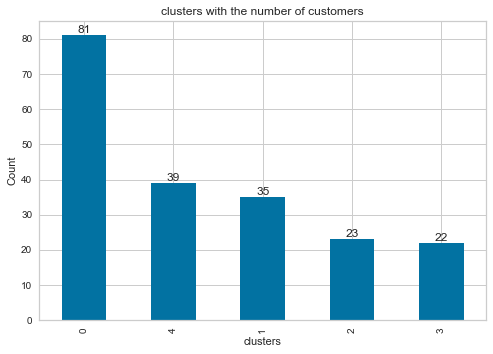

In [199]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X2.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [200]:
df.head()

,age,annual_income,spending_score,cluster_Age_Spending_Score
0,19,15,39,0
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0


In [201]:
df["cluster_Annual_Income_Spending_Score"] = X2.cluster_Kmeans
df.head()

,age,annual_income,spending_score,cluster_Age_Spending_Score,cluster_Annual_Income_Spending_Score
0,19,15,39,0,2
1,21,15,81,2,3
2,20,16,6,0,2
3,23,16,77,2,3
4,31,17,40,0,2


In [204]:
df.drop(columns= "cluster_Age_Spending_Score", inplace=True)

In [205]:
df["cluster_Annual_Income_Spending_Score"] = X2.cluster_Kmeans
df.head()

,age,annual_income,spending_score,cluster_Annual_Income_Spending_Score
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2


In [216]:
df["gender"]=df2["Gender"]

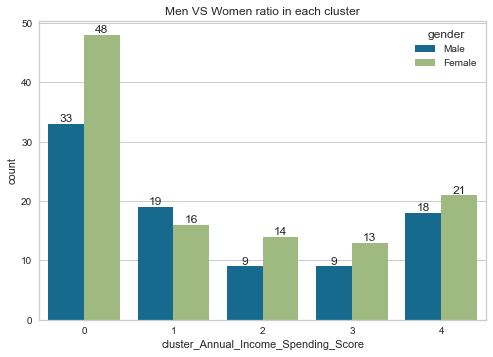

In [217]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.gender)
for p in ax.containers:
    ax.bar_label(p)

In [218]:
df.groupby(["gender", "cluster_Annual_Income_Spending_Score"]).mean()

age  annual_income  \
gender cluster_Annual_Income_Spending_Score                             
Female 0                                     40.895833      55.354167   
       1                                     43.250000      90.937500   
       2                                     43.214286      27.357143   
       3                                     25.461538      25.692308   
       4                                     32.190476      86.047619   
Male   0                                     45.363636      55.212121   
       1                                     39.315789      85.894737   
       2                                     48.333333      24.666667   
       3                                     25.000000      25.777778   
       4                                     33.277778      87.111111   

                                             spending_score  
gender cluster_Annual_Income_Spending_Score                  
Female 0                                          49.000000  
       1                                          22.062500  
       2                                          21.714286  
       3                                          80.538462  
       4                                          81.666667  
Male   0                                          50.272727  
       1                                          12.947368  
       2                                          19.666667  
       3                                          77.666667  
       4                                          82.666667

<AxesSubplot:xlabel='cluster_Annual_Income_Spending_Score', ylabel='spending_score'>

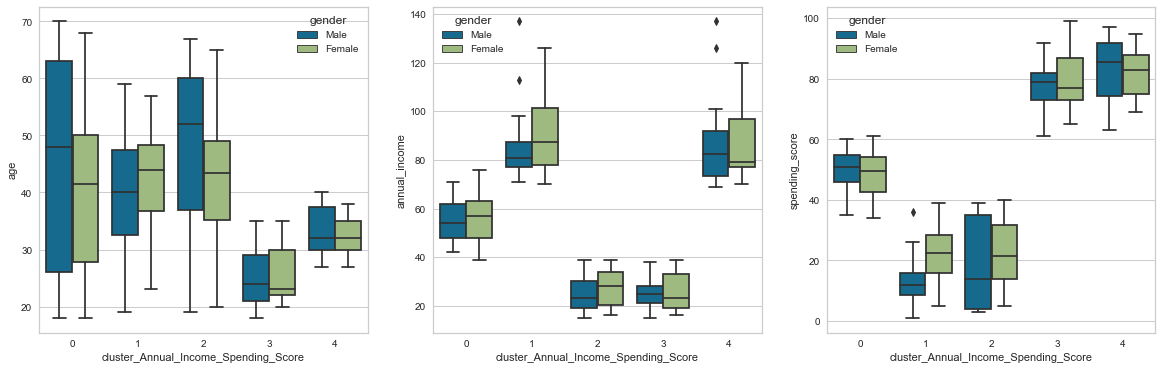

In [220]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "age", x = "cluster_Annual_Income_Spending_Score", hue= "gender", data = df)

plt.subplot(132)
sns.boxplot(y = "annual_income", x = "cluster_Annual_Income_Spending_Score", hue= "gender", data = df)

plt.subplot(133)
sns.boxplot(y = "spending_score", x = "cluster_Annual_Income_Spending_Score", hue= "gender", data = df)

<AxesSubplot:xlabel='cluster_Annual_Income_Spending_Score', ylabel='spending_score'>

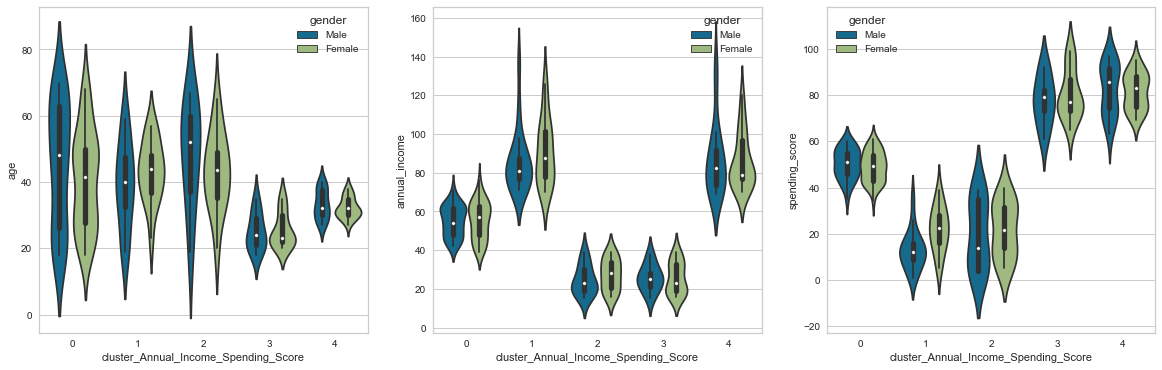

In [221]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "age", x = "cluster_Annual_Income_Spending_Score", hue= "gender", data = df)

plt.subplot(132)
sns.violinplot(y = "annual_income", x = "cluster_Annual_Income_Spending_Score", hue= "gender", data = df)

plt.subplot(133)
sns.violinplot(y = "spending_score", x = "cluster_Annual_Income_Spending_Score", hue= "gender", data = df)

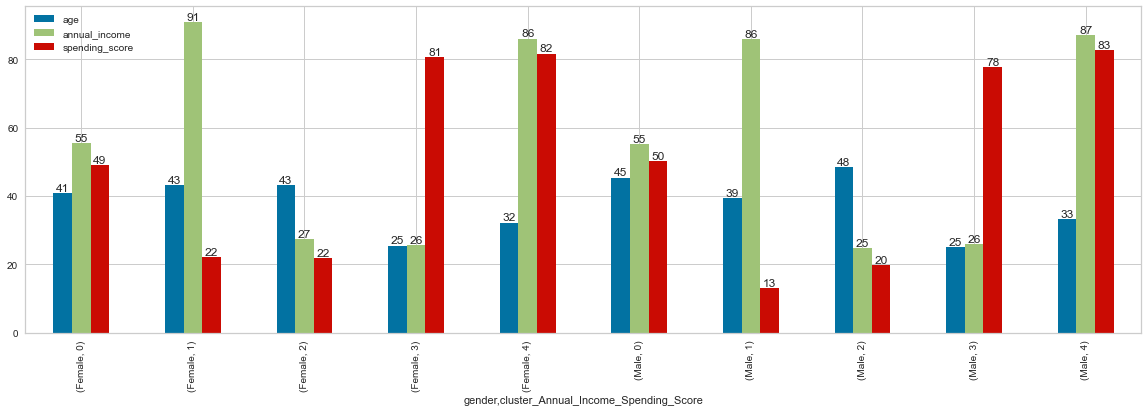

In [222]:
ax = df.groupby(["gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

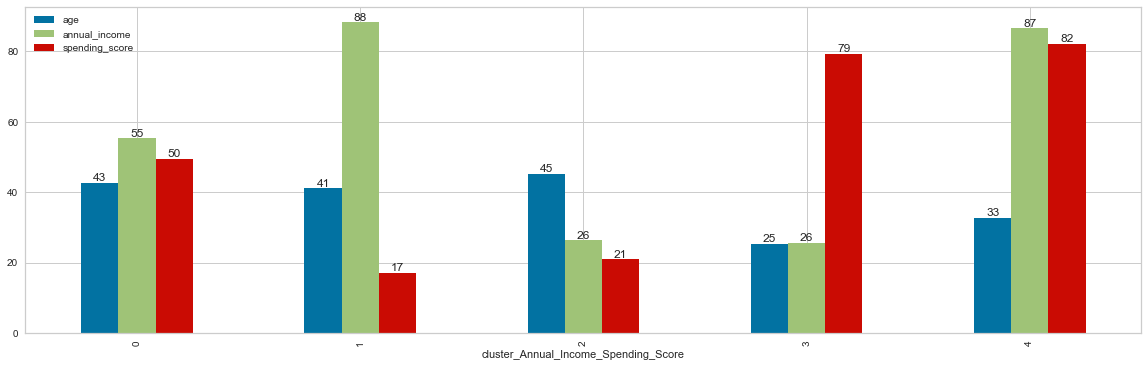

In [225]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 0** : The average age is around 43, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, the annula_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___